<a href="https://colab.research.google.com/github/PlasmaLotus/EmptyProject/blob/main/GTI771/GTI771_TP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GTI771 - Apprentissage machine avancé
## Département du génie logiciel et des technologies de l’information



## Laboratoire 1 - Analyse et préparation des données et extraction de primitives
#### <font color=black> Version 6.0 janvier 2022 </font>
#### <font color=white> Version 4.0 mai 2020 </font>
#### <font color=white> Version 5.0 janvier 2021 </font>

##### Prof. Alessandro L. Koerich

| NOMS                  | CODE PERMANENT                                   |
|-----------------------|--------------------------------------------------|
| Lee-Stenio Nazer      | Nazl14039501                                     |
| Étudiant2             | Code2                                            |
| Étudiant3             | Code3                                            |

## Introduction

Ce premier laboratoire porte sur la définition et l’extraction de primitives sur des visages. Le problème de classification qui vous est présenté est le problème [Facial Expression Recognition (FER)](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data), dont le but est de classer des visages dans sept catégories. En vous basant sur les concepts vus en classe, vous devez définir des primitives que vous jugez pertinentes à extraire sur ces types d’images et effectuer l’extraction de celles-ci sur l’ensemble de données fournies avec cet énoncé.

Veuillez noter que les images qui vous sont fournies ne sont pas nécessairement très faciles à travailler. Plusieurs images comportent du bruit, des artéfacts ou des éléments non pertinents. Le défi de ce laboratoire repose sur cette difficulté qui est chose courante dans des problèmes d’apprentissage machine moderne.

Voici, en exemple, des images de visages se retrouvant dans l’ensemble de données:

![Exemples de FER](https://miro.medium.com/max/2420/1*nXqJ4lMiBRp4Ilm3bpRxuA.png)


L’évaluation de ce laboratoire sera basée sur la qualité des primitives proposées, les réponses aux questions dans cette notebook ainsi que l'organisation de votre code source <font color=black> (SVP, n'oubliez pas de mettre des commentaires dans le code!)</font>. Le pouvoir discriminant, c’est-à-dire la capacité des primitives à bien séparer les exemples des classes dans l’espace des primitives, sera également évalué.

# Partie 1: Imports (5 points)

### 1a: Import de bibliotèques

### À faire:
1. Ajouter toutes les bibliothèques que vous avez utilisées pour compléter ce notebook dans une cellule avec une petite description.

In [ ]:
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library
print('hello')
# Votre code ici
import pandas as pd
import io
from google.colab import files
#data_to_load = files.upload()

hello


Saving fer2013.csv to fer2013.csv


#### Fonctions

In [ ]:
def fa():
    return 1

## Partie 2: Analyse exploratoire des données (10 points)

On va commencer en regardant les données.

Pour ce lab, nous allons utiliser le dataset FER.

Le dataset est disponible dans https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data, et il continent presque 35,000 visages.

## 2a: Charger le fichier de données (2 points)

In [ ]:
# load data
#df = pd.read_csv(io.BytesIO(data_to_load['fer2013.csv']))

ferData = np.loadtxt( 'fer2013.csv', delimiter=',', dtype=str )
 
# Training set
#nbExamplesTraining:28709
#imageSize:2304 = 48x48
Xtrain = np.ones( (28709,2304), float )

for i in range( 1, 28710 ):
    Xtrain[i-1] = ferData[i,1].split(" ")

ytrain = ferData[1:28710,0].astype( int )

# Validation set
Xval = np.ones( (3589,2304), float )

for i in range( 28710, 32299 ):
    Xval[i-28710] = ferData[i,1].split(" ")

yval = ferData[28710:32299,0].astype( int )

# Test set
Xtest = np.ones( (3589,2304), float )

for i in range( 32299, 35888 ):
    Xtest[i-32299] = ferData[i,1].split(" ")

ytest = ferData[32299:,0].astype( int )

print(Xtrain.shape, Xval.shape, Xtest.shape)

(28709, 2304) (3589, 2304) (3589, 2304)


In [ ]:
# reshape to be [samples][channels][width][height]
Xtrain = Xtrain.reshape( Xtrain.shape[0], 1, 48, 48 ).astype('uint8')
Xtest  = Xtest.reshape( Xtest.shape[0], 1, 48, 48 ).astype('uint8')
Xval   = Xval.reshape( Xval.shape[0], 1, 48, 48 ).astype('uint8')

print( Xtrain.shape, Xval.shape, Xtest.shape )

(28709, 1, 48, 48) (3589, 1, 48, 48) (3589, 1, 48, 48)


## 2b: Pre-traitement et visualisation des visages (3 points)

Vous pouvez visualiser les images en utilisant `plt.imshow`.

Il y a différents types de prétraitement que nous pouvons appliquer à des images dans les ensembles de données pour réduire la variabilité, réduire des bruits, etc.

### À faire:
1. Pensez-vous qu’est nécessaire un prétraitement des images? Si oui, vous pouvez choisir différents algorithmes de prétraitement dans [scikit-image](https://scikit-image.org/docs/stable/api/api.html). Il y a aussi autres types de prétraitement plus généraux dans [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).
2. Expliquer et justifier les prétraitements choisis.

#### Code

In [ ]:
# Votre code de pre-processing
# Normalize pictures


from sklearn import preprocessing
#scaler_Xtrain = preprocessing.StandardScaler().fit(Xtrain)
#scaler_Xtest = preprocessing.StandardScaler().fit(Xtest)
#scaler_Xval = preprocessing.StandardScaler().fit(Xval)

#Xtrain_scaled = scaler_Xtrain.transform(Xtrain)
#Xtrain_scaled = scaler_Xtrain.transform(Xtrain)
#Xtrain_scaled = scaler_Xtrain.transform(Xtrain)

"""
#!pip install scipy
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2

#np.fft.
# Weiner filter

print(Xtrain[28700][0])
psf = np.ones((5, 5)) / 25
#psf = np.ones((48, 48)) /(25 *255) #* 255 / 25
image = conv2(Xtrain[28700][0], psf, 'same')
print(Xtrain[28700][0].std())
print(image)
print(image.shape)
print(np.random.standard_normal(image.shape))
image += 0.1 * image.std() * np.random.standard_normal(image.shape,)
deconvolved = restoration.wiener(image, psf, 0.01)
#print(deconvolved)

#print(Xtrain.argmax(axis=3))
#print(psf)
#print(Xtrain[28700][0])# image array [48][48]
print(deconvolved)
"""

#https://stackoverflow.com/questions/41019222/deblur-an-image-using-scikit-image
#https://stackoverflow.com/questions/35192550/wiener-filter-for-image-deblur

[[11 10 12 ... 10 10 10]
 [10 11 13 ... 10 10 11]
 [11 10 12 ... 11 11 10]
 ...
 [10  9 12 ... 11 10 12]
 [10  9 12 ... 11 13 14]
 [11  9 12 ... 12 14 16]]
66.51095583863209
[[ 4.    5.52  6.68 ...  6.12  4.96  3.72]
 [ 5.28  7.28  8.84 ...  8.56  7.04  5.04]
 [ 6.64  9.12 11.08 ... 10.56  8.64  6.24]
 ...
 [ 6.32  8.72 10.72 ... 16.68 11.6   7.12]
 [ 5.04  6.92  8.56 ... 11.24  7.92  5.64]
 [ 3.76  5.16  6.44 ...  7.52  5.92  4.52]]
(48, 48)
[[-0.4278647   0.28900547 -1.87969814 ...  1.14183753 -1.36564443
  -0.947846  ]
 [ 1.03680398 -1.19713322  0.11316456 ... -0.57558432 -0.46828369
   0.67640397]
 [-0.01527279  0.54757267 -0.7123211  ... -1.25242809 -1.16245888
  -1.06251496]
 ...
 [-1.46379119  1.72469425 -1.41221073 ... -0.248619   -1.06902138
  -0.74563778]
 [ 0.22413216  0.36675846  0.39647109 ... -0.08800813  0.98422508
  -1.63293369]
 [-0.92198606 -0.16504954  0.17598891 ... -0.0239959   0.03374349
  -0.43889629]]
[[-1.         -1.          1.         ...  1.          1.
   

#### Résultats et résponses

In [ ]:
# Votre explication/justification

## 2c: Statistiques des données (2 points)

### À faire:
1. Calculer quelques statistiques descriptives (moyenne/écart-type/min/max/etc ) que vous jugez importantes/pertinents sur les entrées (pixels/regions l'images/etc) et sorties (classe/sexe/ethinie/age etc.)

2. Faire une analyse des résultats et présenter vos conclusions sur ces statistiques.

#### Code

[-1.  0.  1.  2.  3.  4.  5.  6.]


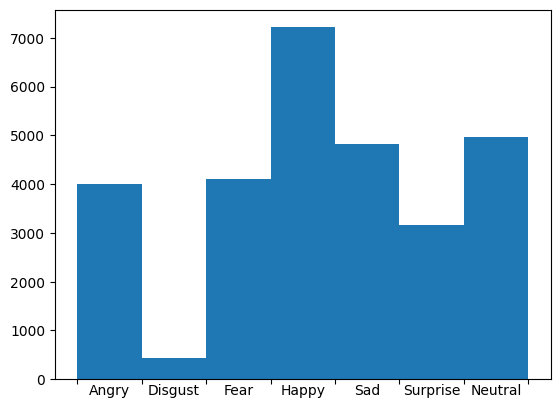

In [ ]:
# Votre code ici

# Code exemple:
# Histogramme des étiquettes (classes)
hist, _ = np.histogram(ytrain, density=False, bins=7, range=(0, 7))

# Code exemple:
# Code exemple
# Plot du histogramme
# import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(ytrain, bins = [0,1,2,3,4,5,6,7]) 

ax.set_xticklabels([])
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
mticks = ax.get_xticks()
mticks = mticks[0:-2]
#print(mticks)
ax.set_xticks((mticks[:-1]+mticks[1:])/2+1, minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)
plt.show()

#### Résultats et résponses

In [ ]:
# Vos résultats ici

## 2d: Créer et évaluer un modèle "template matching" (3 points)

Un deuxièmme modèle simple, mais naturel est une où nous calculons un modèle (prototype/template) moyen (moyenne des valeurs de pixels) pour chaque classe (sur les données d'apprentissage) et nous utilisons ces modèles (templates) pour faire des prédictions sur des nouvelles données.

### À faire:
1. Créer un template/prototype pour chaque classe
2. Faire un plot de chaque template <font color=black> (visage moyen pour chaque classe) </font>
3. Classifier par "template matching - plus proche prototype", tous les exemples (ensembles d'apprentissage, validation et test) et reporter les résultats:<br>
 3a. taux de classification correct sur les trois (3) ensembles de données (sous la forme d'un tableau)<br>
 3b. matrice de confusion pour les résultas sur l'ensemble de test (matrice 7 x 7 - etiquette x prédictions) 
4. Faire une analyse des résultats et présenter vos conclusions sur ce modèle (performe bien/mal, pour quoi?, faiblasses/fortesses, possibles améliorations, etc.)

#### Code

In [ ]:
# Votre code de création des modèles et template matching

#### Résultats et résponses

In [ ]:
# Vos résultats ici

# Partie 3: Extraction de primitives (20 points)

Vous devez faire une recherche bibliographique pour trouver quelles sont les primitives qui sont plus souvent utilisées pour la reconnaissance des expressions faciales. Voici quelques sources et mot-clés pour guider votre recherche:

- http://www.inf.ufpr.br/lesoliveira/download/ESWA2013.pdf
- https://doi.org/10.1016/j.patrec.2015.06.007 
- https://doi.org/10.1109/FG.2011.5771374
- https://www.hindawi.com/journals/ijbi/2015/267807/


Mots-clés: facial expression recognition, facial emotion recognition.

Bibliothèques Python pour l'extraction de primitives :
* [Scikit-image](https://scikit-image.org/docs/dev/)
* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [Scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

Primitives candidates : 

* LBP, LPQ, Gabor filters, SIFT, SURF, HOG, GLCM, Haralick Moments, etc.


#### <font color=red> Attention! Les équipes doivent utiliser des primitives différentes! </font>
- Chaque équipe doit poster un message dans le "forum TP1" avec sa choix
- Premier arrivé premier servi!



## 3a: Extraire des primitives (10 points)

### À faire:
1. Choisir une primitive et extraire ces primitives des visages (ensembles d'apprentissage, validation et test).
Un groupe de primitives peut être 16 filtres Gabor, un ensemble de Haar-like features ou bien les différentes features de Haralick Texture Features (p. ex. contraste, homogénéité, etc.). Vous devez en sélectionner qu'une primitive.

Attention! Le résultat des algorithmes d'extraction de primitives doit être des vecteurs de primitives. Il y a des algorithmes qui nécessitent d'une étape additionnelle comme calculer les histogrammes de primitives (p. ex. LBP, LPQ, SIFT, etc.)

2. <font color=black>Sauvegarder vos vecteurs de primitives dans des fichiers '.csv'. Utiliser la même structure du fichier FER3013, où nous avons dans un seul fichier, séquentiellement, les trois partitions: apprentissage (0-28709), validation (28710-32299) et test (32299, 35888). Nommer vos fichiers de primitive en référence à la primitive utilisée. Ex.: lbp83_fer2013.csv </font> 

3. Justifier votre choix de primitives.

#### Code

In [ ]:
# Votre code ici
#Using GLCM

#### Responses

Vos reponses ici

## 3b: Analyse visuelle des primitives (10 points)

##### À faire:
1. Choisir quelques paires de primitives (deux dimensions de votre vecteur de primitives) et tracer un graphique 2D (données d'apprentissage) pour visualiser si ces primitives sont capables de bien séparer les sept (7) classes.
2. Faire une analyse des résultats de visualisation et présenter vos conclusions sur ces primitives/paires choisies.

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici

# Partie 4: Construction des modèle (20 points)

Nous sommes maintenant prêtes à entraîner un premier modèle avec les primitives extraites dans la Partie 3. 

## 4a: Entraîner des modèles (10 points)

1) Vous devez choisir un des algorithmes d'apprentissage suivants (déjà vues en LOG635) et l'entraîner sur les données d'apprentissage:<br>
* [Decision trees](https://scikit-learn.org/stable/modules/tree.html) de scikit-learn. <br>
* [k-NN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) de scikit-learn. <br>
* [Naïve Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) de scikit-learn. 

2) Un fois choisi l'algorithme d'apprentissage, vous devez entraîner deux modèles:<br>
- Modèle baseline: Entraîner sur les pixels bruts (Partie 2a) ou sur les images de visage prétraites (Partie 2b). Dans ce cas, vous devez "vectoriser" vos images 48x48 pour les transformer dans des vecteurs 2304-dimensional. 
- Modèle "primitive": Entraîner sur les vecteurs de primitive générés dans la Partie 3.

Pour ces premiers modèles entrînes, vous n'êtes pas censé de les régler (optimisation des hyperparamètres). Vous allez faire ce réglage des hyperparamètres dans la Partie (4b).

Après l'entraînement, vous devez faire des prédictions sur les données de validation et test.

### À faire:
1. Expliquer/jurtifier pourquoi vous avez choisi cet algorithme d'apprentissage.
2. Entraîner les modèles avec l'algorithme d'apprentissage choisi
3. Classifier tous les exemples (ensembles d'apprentissage, validation et test) avec les deux modèles et reporter les résultats:<br>
 3a. taux de classification correct sur les trois (3) ensembles de données<br>
 3b. matrice de confusion pour l'ensemble de test
4. Sauvagarder votre modèle dans un fichier. Regarder [model persistence](https://scikitlearn.org/stable/modules/model_persistence.html?highlight=persistence)
5. Mettre les résultats dans un tableau et les comparer avec le modèle "template matching"
5. Faire une analyse des résultats et présenter vos conclusions sur la performance des modèles.
6. Concernant vos primitives, sont-elles discriminantes? Oui/non/pour quoi?

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

#### Vos résultats ici:

##### Exemple:

Taux de classification correcte

| Ensemble | modele pixel |  modèle TM  | modèle Haralick |                                 
|----------|--------------|-------------|-----------------|
| App      | 99,67%       |             |                 |                   
| Val      | 89,77%       |             |                 |                             
| Test     | 77,99%       |             |                 |        

Q1: Nous avons choisi l'algorithme d'arbre de décision parce que...

Q2: Les taux de classification indiquent que le modèle...

Q3: La performance avec le primitive...

## 4b: Réglage du modèle (10 points)

Probablement le modèle "primitive" a outperformé les modèle baseline et TM, mais est-ce qu'on peut mieux performer? <br>

Est-ce qu'on peut faire un "fine-tuning" de vos modèles?<br>

Quels sont les paramètres que vous pouvez ajuster dans l'algorithme d'apprentissafe pour essayer d'améliorer la performance?

##### À faire:
1. Lister les principaux hyperparamètres de votre algorithme d'apprentissage qui peuvent aider à améliorer sa performance.
2. Choisir quelques paramètres (au moins 2) et tourner un "grid search" sur l'ensemble de validation pour trouver les meilleures valeurs pour ces paramètres.
3. Une fois que vous avez trouvé les meilleurs modèles (primitive, baseline et TM), utiliser ces modèles pour reclassifier tous les exemples (apprentissage, validation, test) et reporter les résultats (comme dans la Partie 4a):<br>
 3a. taux de classification correct sur les 3 ensembles<br>
 3b. matrice de confusion pour l'ensemble de test
4. Sauvagarder votre modèle dans un fichier. Regarder [model persistence](https://scikitlearn.org/stable/modules/model_persistence.html?highlight=persistence)
5. Explique pourquoi vous avez choisi ces hyperparamètres pour les optimiser.
6. Faire une analyse des résultats et présenter vos conclusions sur les modèles optimises (comparer avec ceux obténus dans la Partie 4a)

#### Code

In [ ]:
# Votre code ici

#### Grid search

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici: voir Partie 4a

# Partie 5: Réduction de la dimensionnalité (20 points)

Bibliotèques Python pour la reduction de la dimensionnalité : 

* [Transformation algorithms](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Feature selection algorithms](https://scikit-learn.org/stable/modules/feature_selection.html)

## 5a: Réduction de la dimensionnalité (10 points)

### À faire:
1. Choisir un algorithme de transformation de primitives et un algorithme de sélection des primitives pour réduire la dimensionnalité de vos vecteurs de primitives (baseline et primitive).
2. Choisir les deux meilleures primitives et ploter un graphique primitive $pc_1$ (axe x) X primitive $pc_2$ (axe y) X classe (colour) pour visualiser si juste ces deux primitives sont capables de bien séparer les sept (7) classes.
3. Faire une analyse des résultats et présenter vos conclusions sur ces primitives.

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici:

## 5b: Rentraîner les modèles de la Partie 4a (5 points)

Vous devez rentraîner les modèles (baseline et primitive) avec les vecteurs reduits sur les données d'apprentissage.<br>

Après l'rentraînement, vous devez faire des prédictions sur les données de test (reduit par la même transformation/selection).<br>

Présenter les résults (comme dans les Parties 4a et 4b) et comparer avec ceux des Parties 4a et 4b 

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici:

## 5c: Réglage du modèle (5 points)

Vous devez reoptimiser vos nouveaux modèles et les entraîner sur les données d'apprentissage (comme dans la Partie 4b).<br>

Après l'entraînement, vous devez faire des prédictions sur les données de test.<br>

Présenter les résults (comme dans les Parties 4a, 4b et 5a) et comparer avec ceux des Parties 4a, 4b et 5a 

#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici

# Partie 6: Analyse qualitative (5 points)

Choisir dans l'ensemble de test, quelques exemples de visages bien et mal classifié par le modèle le plus performant et montrer ces exemples avec la vraie étiquette et la prédiction faite par votre meilleur modèle.

#### Code

In [ ]:
# Vos résultats ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici


# Partie 7: Cross-Dataset Challenge (10 points)

Vous devez tester la capacité de généralisation de votre modèle "primitive" (déjà entraîné et testé sur FER) sur un autre ensemble de données.
    
L’ensemble de données en question c'est le Jaffe dataset qui contient 213 images de sept (7) expressions faciales pose par 10 modèles féminines japonaises. Chaque image a été étiquetée dans six (6) adjectives d’émotion par 60 sujets japonaises. 

L’ensemble de données originel contient des images 256x256 en niveau de gris, dans le format .tiff, sans compression.

Vous avez les données redimensionnées à 48x48 pixels (`jaffe_48x48.csv`), aussi que les données dans la dimension originelle (`jaffe_256x256.csv`). 
    
* Angry (30 exemples):   Y_test[0:30]   = 0 
* Disgust (29 exemples): Y_test[30:59]  = 1
* Fear (32 exemples): Y_test[59:91]  = 2 
* Happy (31 exemples): Y_test[91:122] = 3 
* Neutral (30 exemples): Y_test[122:152]= 6 
* Surprise (31 exemples): Y_test[152:183]= 5 
* Sad (30 exemples): Y_test[183:213]= 4 

Attention! Est-ce que le rapport émotion x étiquette numérique est le même que FER?
    
    


## 7a: Charger le fichier de données de test (2 points)


In [ ]:
import numpy as np

# Read from file
X_test_jaffe = np.loadtxt('jaffe_48x48.csv', delimiter=',', dtype=int)
#X_test_jaffe = np.loadtxt('jaffe_256x256.csv', delimiter=',', dtype=int)
y_test_jaffe = np.loadtxt('jaffe_labels.csv', delimiter=',', dtype=int)

# reshape to be [samples][pixels][width][height]
X_test_jaffe  = X_test_jaffe.reshape(X_test_jaffe.shape[0], 1, 48, 48).astype('uint8')
#X_test_jaffe  = X_test_jaffe.reshape(X_test_jaffe.shape[0], 1, 256, 256).astype('uint8')

X_test_jaffe.dtype


## 7b: Visualisation des visages de Jaffe (8 points)


In [ ]:
import matplotlib.pyplot as plt
def getLabel(id):
    return ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][id]
plt.figure(figsize=(10, 10))
j = 0
for i in [5, 40, 70, 105, 135, 171, 191]:
    plt.subplot(330 + 1 + j)
    plt.imshow(np.squeeze(X_test_jaffe[i], axis=0),cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Label = %s' % getLabel(y_test_jaffe[i]), fontsize = 12)
    j = j + 1
plt.show()


### À faire:
1. Apliquer les mêmes prétraitemens sur les images de Jaffe
2. Extraire les mêmes primitives des images de Jaffe
3. Avoir les mêmes étiquettes (chiffre x émotion) de FER
1. Tester vos modèles sur les 213 images de Jaffe dataset.
2. Faire une analyse des résultats et présenter vos conclusions sur la capacité de generalisation de votre modèle.


#### Code

In [ ]:
# Votre code ici

#### Résultats et résponses

In [ ]:
# Vos résultats ici

## Partie Finale : Conclusion (5 points)

### À faire:
1. Résumer et comparer les principaux résultats .
2. Faire une analyse des résultats obtenus et présenter vos conclusions sur les différents modèles que vous avez entraînés.

#### Résultats et résponses

In [ ]:
# Vos résultats ici: